In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# application = pd.read_csv("data/application_data.csv")
# previous_application = pd.read_csv("data/previous_application.csv")
# column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")
merged_df = pd.read_pickle('data/merged_df.pkl')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
merged_df2 = merged_df.copy()

In [5]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list,AMT_GOODS_PRICE_y_list,WEEKDAY_APPR_PROCESS_START_y_list,HOUR_APPR_PROCESS_START_y_list,FLAG_LAST_APPL_PER_CONTRACT_list,NFLAG_LAST_APPL_IN_DAY_list,RATE_DOWN_PAYMENT_list,RATE_INTEREST_PRIMARY_list,RATE_INTEREST_PRIVILEGED_list,NAME_CASH_LOAN_PURPOSE_list,NAME_CONTRACT_STATUS_list,DAYS_DECISION_list,NAME_PAYMENT_TYPE_list,CODE_REJECT_REASON_list,NAME_TYPE_SUITE_y_list,NAME_CLIENT_TYPE_list,NAME_GOODS_CATEGORY_list,NAME_PORTFOLIO_list,NAME_PRODUCT_TYPE_list,CHANNEL_TYPE_list,SELLERPLACE_AREA_list,NAME_SELLER_INDUSTRY_list,CNT_PAYMENT_list,NAME_YIELD_GROUP_list,PRODUCT_COMBINATION_list,DAYS_FIRST_DRAWING_list,DAYS_FIRST_DUE_list,DAYS_LAST_DUE_1ST_VERSION_list,DAYS_LAST_DUE_list,DAYS_TERMINATION_list,NFLAG_INSURED_ON_APPROVAL_list
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,[1038818],[Consumer loans],[9251.775],[179055.0],[179055.0],[0.0],[179055.0],[SATURDAY],[9],[Y],[1],[0.0],[nan],[nan],[XAP],[Approved],[-606],[XNA],[XAP],[nan],[New],[Vehicles],[POS],[XNA],[Stone],[500],

In [25]:
num = merged_df.select_dtypes(exclude='object').columns
cat = merged_df.select_dtypes(include='object').columns
print(num,"\n",cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

**We have consider to drop the columns with more than 47% of nan data.**

In [7]:
df_copy = merged_df2.copy()
for columns in df_copy.columns:
    if (df_copy[columns].isna().sum()/len(df_copy["SK_ID_CURR"])*100)>47:
        df_copy.drop(columns,axis=1,inplace=True)

In [8]:
round(df_copy.isna().sum().sort_values(ascending=True)/len(df_copy["SK_ID_CURR"])*100,2)

SK_ID_CURR                     0.000
HOUR_APPR_PROCESS_START        0.000
REG_REGION_NOT_LIVE_REGION     0.000
REG_REGION_NOT_WORK_REGION     0.000
LIVE_REGION_NOT_WORK_REGION    0.000
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.500
AMT_REQ_CREDIT_BUREAU_HOUR    13.500
AMT_REQ_CREDIT_BUREAU_WEEK    13.500
EXT_SOURCE_3                  19.830
OCCUPATION_TYPE               31.350
Length: 109, dtype: float64

**EXT_SOURCE_1 variable was added as it is used in feature engineering.**

In [9]:
df_copy["EXT_SOURCE_1"]=merged_df2["EXT_SOURCE_1"]
print("Number of columns left after dropping columns:",len(df_copy.columns))

Number of columns left after dropping columns: 110


**The columns having nan values between 5.83% and 47%.**

**would be replaced by mean for continuous column**

**for categorical column we would use mode.**

In [10]:
categorical_list=[]
continuous_list=[]
for column in df_copy.columns:
    if 5.36<(df_copy[column].isna().sum()/len(df_copy["SK_ID_CURR"])*100):
        if ~column.endswith("list"):
            if len(df_copy[column].unique())<20:
                categorical_list.append(column)
            else:
                continuous_list.append(column)
    

print("Categorical columns with more than 5.35% nan values",categorical_list)
print("Continuous columns with more than 5.35% nan values",continuous_list)

Categorical columns with more than 5.35% nan values ['OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']
Continuous columns with more than 5.35% nan values ['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1']


**AMT_REQ_CREDIT_BUREAU variables are consider continuous variable.**

In [11]:
continuous_list.extend(categorical_list[1:])
print(continuous_list)
print()
categorical_list=categorical_list[:1]
print(categorical_list)

['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']

['OCCUPATION_TYPE']


In [12]:
from sklearn.impute import SimpleImputer
import numpy as np
from numpy import isnan
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
value=df_copy[continuous_list].values
transformed_values=imp.fit_transform(value)
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


In [13]:
df_copy[continuous_list]=transformed_values

In [14]:
merged_df[categorical_list].isna().sum()

OCCUPATION_TYPE    96391
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
import numpy as np
from numpy import isnan
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
value=df_copy[categorical_list].values
transformed_values=imp.fit_transform(value)


In [16]:
df_copy[categorical_list]=transformed_values

In [17]:
(df_copy.isna().sum()/len(df_copy)*100).sort_values(ascending=False).head(100)

HOUR_APPR_PROCESS_START_y_list      5.351
NAME_PAYMENT_TYPE_list              5.351
NAME_CONTRACT_STATUS_list           5.351
NAME_CASH_LOAN_PURPOSE_list         5.351
RATE_INTEREST_PRIVILEGED_list       5.351
RATE_DOWN_PAYMENT_list              5.351
NFLAG_LAST_APPL_IN_DAY_list         5.351
FLAG_LAST_APPL_PER_CONTRACT_list    5.351
NFLAG_INSURED_ON_APPROVAL_list      5.351
WEEKDAY_APPR_PROCESS_START_y_list   5.351
AMT_GOODS_PRICE_y_list              5.351
AMT_DOWN_PAYMENT_list               5.351
AMT_CREDIT_y_list                   5.351
AMT_APPLICATION_list                5.351
AMT_ANNUITY_y_list                  5.351
NAME_CONTRACT_TYPE_y_list           5.351
SK_ID_PREV_list                     5.351
DAYS_DECISION_list                  5.351
RATE_INTEREST_PRIMARY_list          5.351
CODE_REJECT_REASON_list             5.351
CNT_PAYMENT_list                    5.351
DAYS_TERMINATION_list               5.351
DAYS_LAST_DUE_list                  5.351
NAME_TYPE_SUITE_y_list            

### columns having 5.35% missing values

In [18]:
col = ['AMT_ANNUITY_y_list','CNT_PAYMENT_list','NAME_PORTFOLIO_list','NAME_PRODUCT_TYPE_list','CHANNEL_TYPE_list','SELLERPLACE_AREA_list',
'NAME_SELLER_INDUSTRY_list','PRODUCT_COMBINATION_list','NAME_YIELD_GROUP_list','AMT_APPLICATION_list','DAYS_FIRST_DRAWING_list',
'DAYS_FIRST_DUE_list','DAYS_TERMINATION_list','NAME_GOODS_CATEGORY_list','NAME_CLIENT_TYPE_list','NAME_TYPE_SUITE_y_list',
'CODE_REJECT_REASON_list','AMT_CREDIT_y_list','AMT_DOWN_PAYMENT_list','AMT_GOODS_PRICE_y_list','NFLAG_LAST_APPL_IN_DAY_list'
,'RATE_DOWN_PAYMENT_list','RATE_INTEREST_PRIMARY_list','RATE_INTEREST_PRIVILEGED_list','NAME_CASH_LOAN_PURPOSE_list','NAME_CONTRACT_STATUS_list'
,'SK_ID_PREV_list','NAME_PAYMENT_TYPE_list','DAYS_DECISION_list','NFLAG_INSURED_ON_APPROVAL_list']

In [19]:
# dropped those rows
df_copy.dropna(inplace=True)

In [20]:
merged_df = df_copy.copy()

### Outliers

In [21]:
df_copy.set_index('SK_ID_CURR',inplace=True)

In [22]:
num = df_copy.select_dtypes(exclude='object').columns
cat = df_copy.select_dtypes(include='object').columns
print(num,"\n",cat)

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'EXT_SOURCE_1'],
      dtype='object') 
 Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
   

In [23]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])   
    for column in cols:
        if column in dataframe.columns:
            q1 = dataframe[column].quantile(0.25) 
            
            q3 = dataframe[column].quantile(0.75)
            
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

In [24]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    new_datafr = dataframe.copy()
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            new_datafr[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return new_datafr    


In [25]:
detect_outliers(df_copy[list(num)])

,Feature,Number of Outliers
0,AMT_INCOME_TOTAL,12241
1,AMT_CREDIT,5399
2,AMT_ANNUITY,6259
3,AMT_GOODS_PRICE,12573
4,REGION_POPULATION_RELATIVE,7234
5,DAYS_BIRTH,0
6,DAYS_EMPLOYED,68013
7,DAYS_REGISTRATION,615
8,DAYS_ID_PUBLISH,0
9,HOUR_APPR_PROCESS_START,2159


In [26]:
from scipy.stats.mstats import winsorize

In [28]:
treated_df = treat_outliers(df_copy)

In [29]:
merged_df = treated_df.copy()

## Seperated list data for now

In [30]:
list_columns = ['SK_ID_PREV_list',
       'NAME_CONTRACT_TYPE_y_list', 'AMT_ANNUITY_y_list',
       'AMT_APPLICATION_list', 'AMT_CREDIT_y_list', 'AMT_DOWN_PAYMENT_list',
       'AMT_GOODS_PRICE_y_list', 'WEEKDAY_APPR_PROCESS_START_y_list',
       'HOUR_APPR_PROCESS_START_y_list', 'FLAG_LAST_APPL_PER_CONTRACT_list',
       'NFLAG_LAST_APPL_IN_DAY_list', 'RATE_DOWN_PAYMENT_list',
       'RATE_INTEREST_PRIMARY_list', 'RATE_INTEREST_PRIVILEGED_list',
       'NAME_CASH_LOAN_PURPOSE_list', 'NAME_CONTRACT_STATUS_list',
       'DAYS_DECISION_list', 'NAME_PAYMENT_TYPE_list',
       'CODE_REJECT_REASON_list', 'NAME_TYPE_SUITE_y_list',
       'NAME_CLIENT_TYPE_list', 'NAME_GOODS_CATEGORY_list',
       'NAME_PORTFOLIO_list', 'NAME_PRODUCT_TYPE_list', 'CHANNEL_TYPE_list',
       'SELLERPLACE_AREA_list', 'NAME_SELLER_INDUSTRY_list',
       'CNT_PAYMENT_list', 'NAME_YIELD_GROUP_list', 'PRODUCT_COMBINATION_list',
       'DAYS_FIRST_DRAWING_list', 'DAYS_FIRST_DUE_list',
       'DAYS_LAST_DUE_1ST_VERSION_list', 'DAYS_LAST_DUE_list',
       'DAYS_TERMINATION_list', 'NFLAG_INSURED_ON_APPROVAL_list']
list_data = merged_df[list_columns]
merged_df.drop(list_columns,axis=1,inplace=True)

### Function to reduce categorical classes

In [31]:
def reduce_classes(columns_list):
    for col in columns_list:
        other_classes = list(merged_df[col].value_counts()[10:].index)
        merged_df[col] = merged_df[col].replace(other_classes,'Other')

reduce_classes(['OCCUPATION_TYPE','ORGANIZATION_TYPE'])

## Encoding

In [32]:
nominal = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
          'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
           'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

ordinal = ['CNT_CHILDREN','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [33]:
# for col in ordinal:
#     encoder = LabelEncoder()
#     merged_df[col] = encoder.fit_transform(merged_df[col])

In [34]:
encoded_df = pd.get_dummies(merged_df[nominal])
merged_df.drop(nominal,axis=1,inplace=True)
merged_df = merged_df.merge(encoded_df,left_index=True,right_index=True)

In [23]:
#encoded_df = merged_df.copy()

In [35]:
merged_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,"202,500.000","406,597.500","24,700.500","351,000.000",0.019,-10308,-637,"-3,648.000",-2120,1,1,0,1,1,0,1.000,2,2,10,0,0,0,0,0,0,0.263,0.175,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,0.225,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
100003,0,0,"270,000.000","1,125,000.000","35,698.500","1,057,500.000",0.005,-16765,-1188,"-1,186.000",-728,1,1,0,1,1,0,2.000,1,1,11,0,0,0,0,0,0,0.622,0.511,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.311,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0

## Days Conversion

In [36]:
days_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
merged_df[days_columns] = np.abs(merged_df[days_columns])

## Scaling

In [37]:
num = df_copy.select_dtypes(exclude='object').columns

In [39]:
scaler = StandardScaler()
merged_df[num] = scaler.fit_transform(merged_df[num])

In [40]:
df = merged_df.copy()

In [42]:
df.merge(list_data,right_index=True,left_index=True)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA,SK_ID_PREV_list,NAME_CONTRACT_TYPE_y_list,AMT_ANNUITY_y_list,AMT_APPLICATION_list,AMT_CREDIT_y_list,AMT_DOWN_PAYMENT_list,AMT_GOODS_PRICE_y_list,WEEKDAY_APPR_PROCESS_START_y_list,HOUR_APPR_PROCESS_START_y_list,FLAG_LAST_APPL_PER_CONTRACT_list,NFLAG_LAST_APPL_IN_DAY_list,RATE_DOWN_PAYMENT_list,RATE_INTEREST_PRIMARY_list,RATE_INTEREST_PRIVILEGED_list,NAME_CASH_LOAN_PURPOSE_list,NAME_CONTRACT_STATUS_list,DAYS_DECISION_list,NAME_PAYMENT_TYPE_list,CODE_REJECT_REASON_list,NAME_TYPE_SUITE_y_list,NAME_CLIENT_TYPE_list,NAME_GOODS_CATEGORY_list,NAME_PORTFOLIO_list,NAME_PRODUCT_TYPE_list,CHANNEL_TYPE_list,SELLERPLACE_AREA_list,NAME_SELLER_INDUSTRY_list,CNT_PAYMENT_list,NAME_YIELD_GROUP_list,PRODUCT_COMBINATION_list,DAYS_FIRST_DRAWING_list,DAYS_FIRST_DUE_list,DAYS_LAST_DUE_1ST_VERSION_list,DAYS_LAST_DUE_list,DAYS_TERMINATION_list,NFLAG_INSURED_ON_APPROVAL_list
SK_ID_C

In [43]:
df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0.716,-0.489,-0.120,-0.533,-0.057,-1.403,-0.481,-0.396,-0.627,1,1,0,1,1,0,1.000,2,2,-0.695,0,0,0,0,0,0,-1.386,-2.087,0.594,2.000,0.603,2.000,-0.198,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.404,-0.403,-0.443,-0.521,-0.558,-0.603,-2.409,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
100003,0,0,1.798,1.753,0.851,1.873,-1.435,0.157,-0.477,-1.144,-1.604,1,1,0,1,1,0,2.000,1,1,-0.337,0,0,0,0,0,0,0.606,0.013,-0.085,0.000,-0.079,0.000,0.196,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.404,-0.403,-0.443,-0.521,-0.558,-1.357,-1.645,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,

In [44]:
km = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [35]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [37]:
dist = []

for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(df)
    dist.append(km.inertia_)


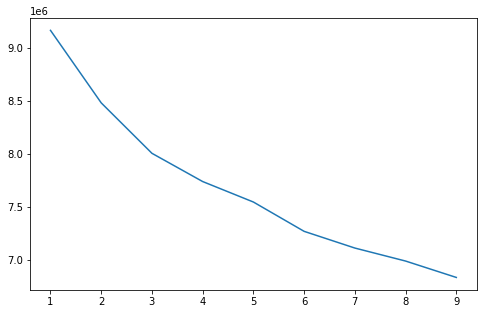

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10),dist)
plt.show()

In [38]:
dist

[9167456.253465649,
 8482474.077284593,
 8005952.065630841,
 7739229.0687684305,
 7545795.477207362,
 7268879.031188381,
 7111057.236255036,
 6988282.396342893,
 6833389.801289021]

In [45]:
km = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [46]:
df["clusters"] = km.fit_predict(df.drop('TARGET',axis=1))

In [47]:
df.to_pickle('data/outliers_df.pkl')